# Airbnb Price Estimation Task
In this project you will be given data collected from Airbnb listings in New York City from 2008 to
2019. Your task is to build a regression model which estimates the price of an Airbnb listing
given several relevant factors, including
- Location (neighborhood, latitude, longitude)
- Housing Information (type of room)
- Booking/Housing Information (type of room, minimum # of nights, # of days in the year
the listing is available, license)
- Reviews (total # of reviews, date of last review, average # of reviews per month)
- Host Information (host name, host id, how many listings the host has)

In [1]:
# import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

## Examine the data

In [2]:
url_train = "https://raw.githubusercontent.com/helenma0223234/Kaggle_Airbnb_price_prediction/main/train.csv"
data = pd.read_csv(url_train)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16221 entries, 0 to 16220
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16221 non-null  object 
 1   name                            16219 non-null  object 
 2   host_id                         16221 non-null  int64  
 3   host_name                       16221 non-null  object 
 4   neighbourhood_group             16221 non-null  object 
 5   neighbourhood                   16221 non-null  object 
 6   latitude                        16221 non-null  float64
 7   longitude                       16221 non-null  float64
 8   room_type                       16221 non-null  object 
 9   minimum_nights                  16221 non-null  int64  
 10  number_of_reviews               16221 non-null  int64  
 11  last_review                     16221 non-null  object 
 12  reviews_per_month               

In [ ]:
data.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price
0,a922764,Top Floor 2bd Luxury Brownstone Apt,1204785,Lorrie,Brooklyn,Fort Greene,40.68601,-73.975150,Entire home/apt,30,277,2022-07-23,2.28,1,288,1,NaN,199
1,a16365302,Bond Street 2 bedroom 2 bath great NOHO location,24074171,Donna,Manhattan,NoHo,40.72693,-73.993220,Entire home/apt,3,37,2020-11-30,0.50,1,4,0,NaN,432
2,a2432622,Your new happy place in Greenpoint/Williamsburg,377287,Marianne,Brooklyn,Greenpoint,40.72358,-73.954260,Entire home/apt,2,25,2022-04-23,0.24,1,134,3,NaN,400
3,a2525956,Beautiful 1 Bdr in the heart of NYC,7365834,Alex,Manhattan,Theater District,40.76038,-73.981960,Entire home/apt,30,16,2017-12-01,0.15,5,70,0,NaN,129
4,a34340299,Spacious 1 bed apartment with private terrace,41213523,Mathieu,Manhattan,East Village,40.72899,-73.980910,Entire home/apt,30,7,2020-01-02,0.15,1,0,0,NaN,250
5,a9918963,Brooklyn Apt with Patio in Heart of Fort Greene,50994782,Clay,Brooklyn,Fort Greene,40.68851,-73.971240,Entire home/apt,2,31,2022-09-25,0.36,1,0,8,NaN,175
6,a682684527659690406,Green Olives Condominiums 1,60847286,Mohammad,Queens,Woodside,40.74223,-73.905800,Private room,2,9,2023-01-01,1.29,2,309,9,NaN,125
7,a54364623,Romantic and sunny 2-bedrooms rental unit Broo...,13187650,L'Equipe,Brooklyn,Bedford-Stuyvesant,40.68930,-73.954540,Entire home/apt,1,40,2023-02-28,3.05,1,44,38,NaN,288
8,a726667728496451227,Charming 2 bedroom in a quiet tree lined street,188737645,John,Bronx,Pelham Gardens,40.86457,-73.841120,Entire home/apt,3,10,2023-02-26,6.52,1,161,10,NaN,121
9,a824421,Central Williamsburg Fab Large Room,4328005,Dina,Brooklyn,Williamsburg,40.71803,-73.962110,Private room,30,7,2015-01-07,0.06,1,0,0,NaN,70


In [ ]:
data.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           16221
price                                 0
dtype: int64

In [ ]:
print(data.nunique())

id                                16221
name                              15978
host_id                           12070
host_name                          5543
neighbourhood_group                   5
neighbourhood                       213
latitude                          11480
longitude                         10463
room_type                             4
minimum_nights                       72
number_of_reviews                   443
last_review                        1942
reviews_per_month                   818
calculated_host_listings_count       56
availability_365                    366
number_of_reviews_ltm               147
license                               0
price                               670
dtype: int64


Exploratory attempt shows that there's no missing entries in all columns except license, which has all NaN values. Gap in the number of unique values in `id` and `name`, and `host_id` and `host_name` indicates that `id` and `host_id` are more unique identifying, the other two names have overlaps considering people/users have same first/last names

In [ ]:
# looking at columns where their types are `object`
for col in data.select_dtypes(include=['object']):
    data[col] = data[col].astype('category')
cat_col = data.select_dtypes(include=['category'])
for col in cat_col:
    print('Unique Values in {} include: \n'.format(col),data[col].unique())
    print('-'*60)

Unique Values in id include: 
 ['a922764', 'a16365302', 'a2432622', 'a2525956', 'a34340299', ..., 'a19028078', 'a688505075508176871', 'a14452731', 'a4885673', 'a20662043']
Length: 16221
Categories (16221, object): ['a10000070', 'a1001147', 'a10011850', 'a10014783', ..., 'a9997449',
                             'a9997980', 'a9998930', 'a999984']
------------------------------------------------------------
Unique Values in name include: 
 ['Top Floor 2bd Luxury Brownstone Apt', 'Bond Street 2 bedroom 2 bath great NOHO locat..., 'Your new happy place in Greenpoint/Williamsburg', 'Beautiful 1 Bdr in the heart of NYC', 'Spacious 1 bed apartment with private terrace', ..., 'Elegant Guest Room A', 'Central Park and River: Washer, Desk, Closet,..., 'Cozy room just 15 mins from Central Park', 'Stylish  Shared Apt w Large Private Room', 'BKLYN 2 Queen bedrooms A/C 2 Bathrooms']
Length: 15979
Categories (15978, object): ['!!Beautiful Large 3 Bedroom Apartment in NYC!!', '!!Studio next to Empire S

`host_name` is interestingly also an object, might consider to just use `host_id` which is more uniform and uniquely-identifying if we use it as a feature

## Exploratory Data Cleaning & Analysis
Take a quick look at price distribution first...

Text(0.5, 1.0, 'Price Distribution Plot')

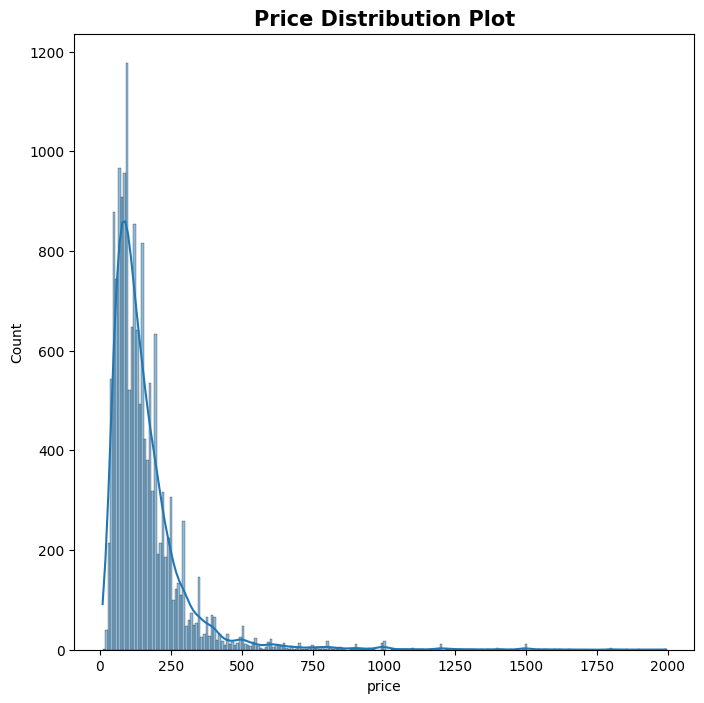

In [ ]:
plt.figure(figsize=(8,8))
mu, std = norm.fit(data['price'])
sns.histplot(data['price'], kde=True)
plt.title("Price Distribution Plot",size=15, weight='bold')

The distribution plot above illustrates a right-skewed price distribution. To mitigate this skewness and facilitate more straightforward interpretation and statistical analysis, a log transformation will be employed.

Text(0.5, 1.0, 'Log Price Distribution Plot')

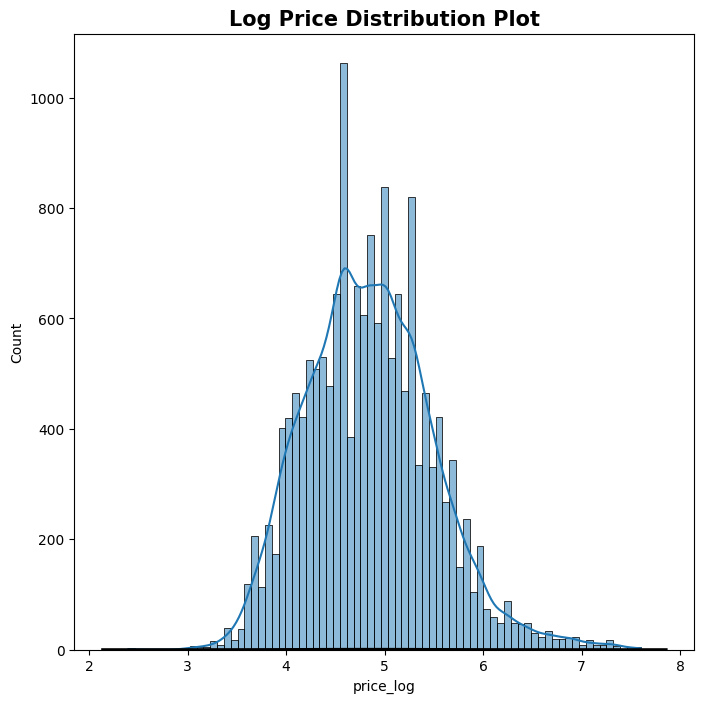

In [ ]:
# To prevent division by zero, use a log transformation with offset of 1
data['price_log'] = np.log(data.price+1)
# and plot again...
plt.figure(figsize=(8,8))
mu, std = norm.fit(data['price_log'])
sns.histplot(data['price_log'], kde=True)
xmin, xmax = plt.xlim()
# add a fitted normal distribution curve to the plot
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Log Price Distribution Plot",size=15, weight='bold')

Below graph shows details about price and room type based on neighborhood group. Manhattan has much more offerings, and a more diverse range of prices. The highest price of Entire Home/Aptis is in Brooklyn but on average higher in Manhattan. Also, Brooklyn also has high prices both in Private Room and Entire Home/Apt compared with Queens. Prices at State Island and Bronx are in general at a lower spectrum.

Text(0.5, 1.0, 'Room Type vs Neighbourhood Group vs Price')

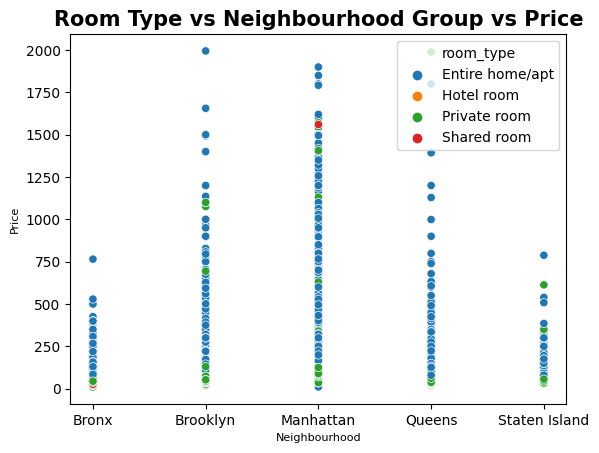

In [ ]:
sns.scatterplot(x="neighbourhood_group", y="price",
            hue="room_type",
            sizes=(50, 200), data=data)

plt.xlabel("Neighbourhood", size=8)
plt.ylabel("Price", size=8)
plt.title("Room Type vs Neighbourhood Group vs Price",size=15, weight='bold')

Room type could be a good hint for price, see the graph below, hotel rooms are on average higher price but their listings on Airbnb are scarce

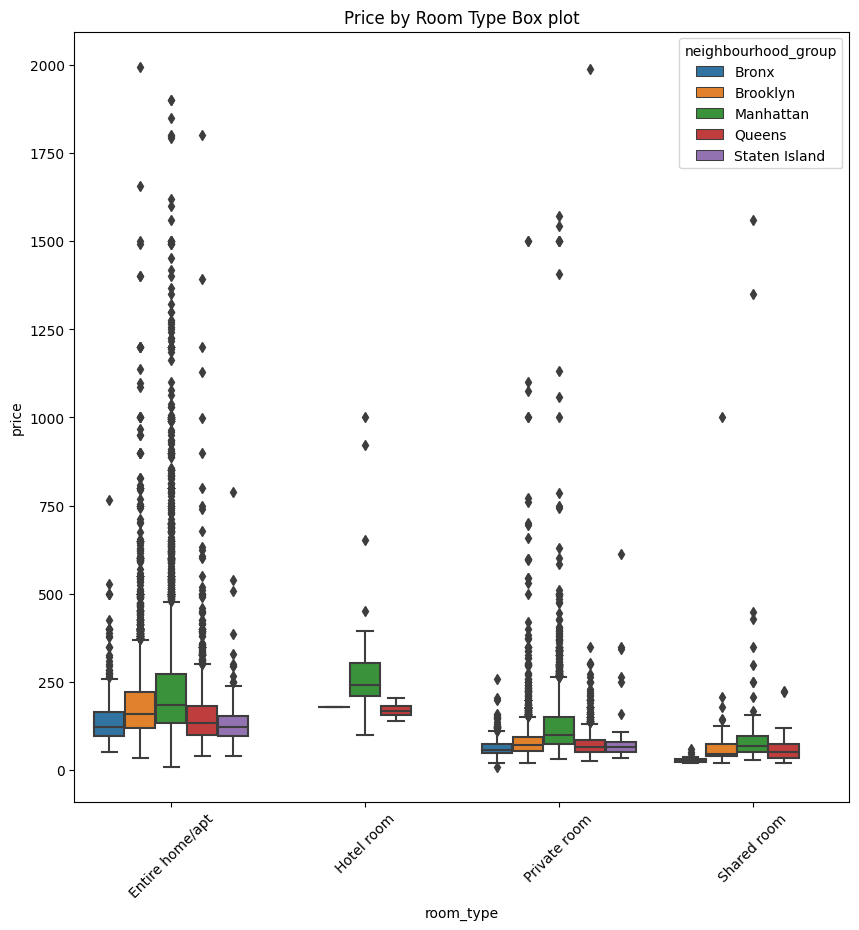

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, x='room_type', y='price', hue="neighbourhood_group")
plt.title('Price by Room Type Box plot')
plt.xticks(rotation=45)
plt.show()

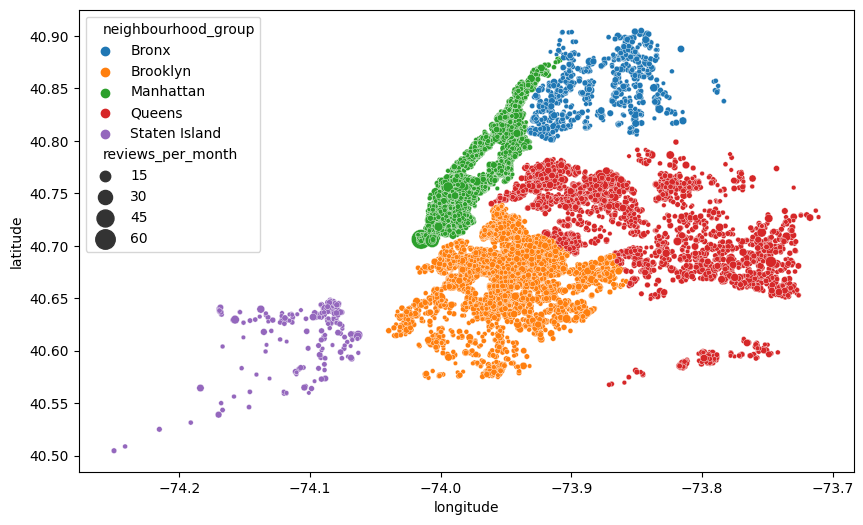

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', size='reviews_per_month', sizes=(10, 200))
plt.show()

Interestingly enough, around 1/3 of the listing has 0 availability in a year.

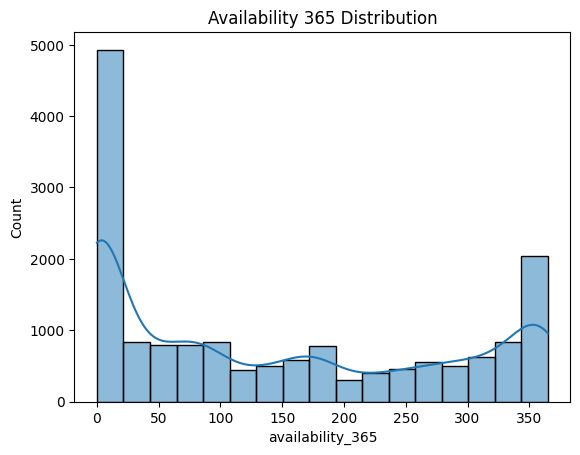

In [ ]:
sns.histplot(data=data, x='availability_365', kde=True)
plt.title('Availability 365 Distribution')
plt.show()

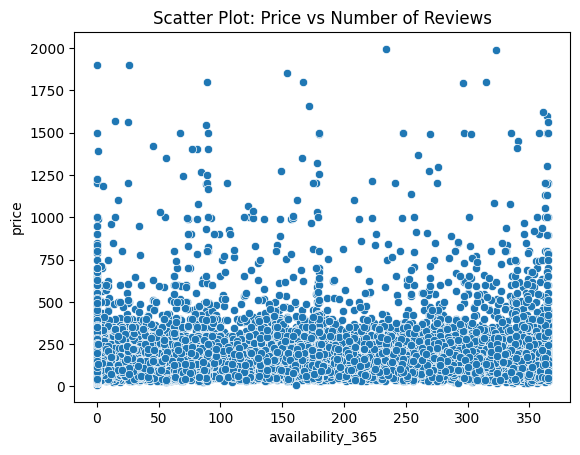

In [ ]:
sns.scatterplot(data=data, x='availability_365', y='price')
plt.title('Scatter Plot: Price vs Number of Reviews')
plt.show()

See below for pairwise correlations between numeric columns of interest, dropped id, host_id since they are more like identifier for users, and dropped *log_price*, we can see:
- latitude is slightly correlational with price (the relationship is more obvious in the graphs based on categorical columns like the neighborhood groups)
- number_of_reviews_ltm and reviews_per_month are highly correlated, so we could consider just using one of them as a feature potentially for computational efficiency and simplicity
- there is also no strong relationship between price and other features

<ipython-input-61-7f9126830241>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data2.corr(method='pearson')


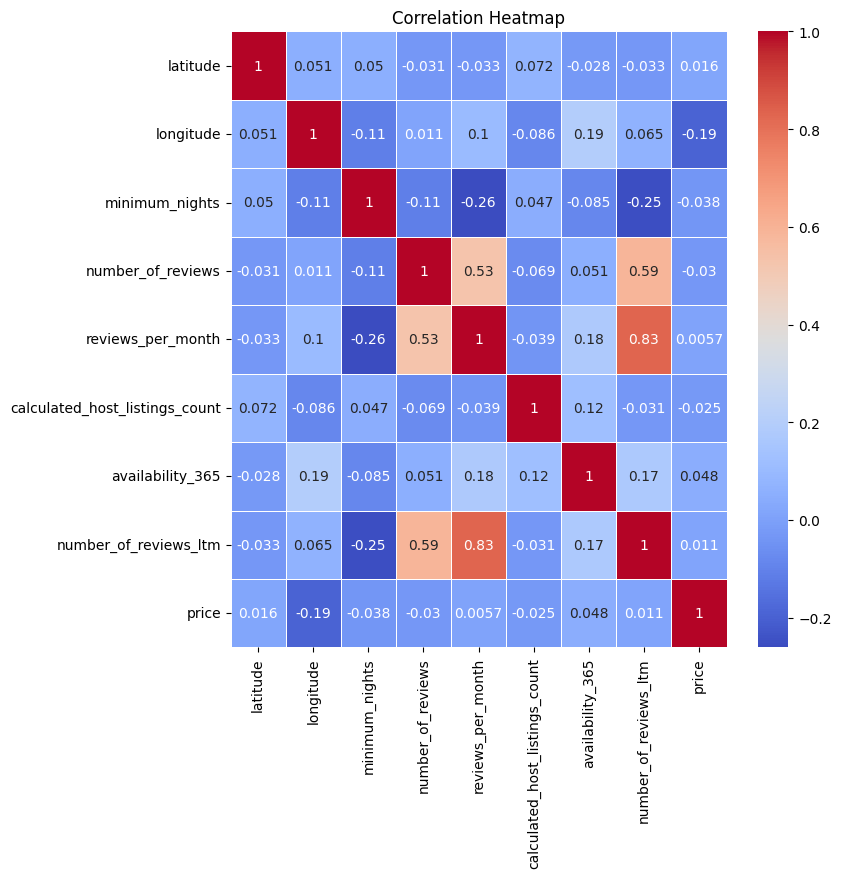

In [ ]:
plt.figure(figsize=(8,8))
data2 = data.drop(['id', 'license', 'price_log', 'host_id'], axis=1)
# Calculate the correlation matrix
correlation_matrix = data2.corr(method='pearson')

# heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Preparing the dataset for modeling

Initially, we will remove non-categorical data and the old price, and `calculated_host_listings_count` since we are droping host and host_id as well.

In [ ]:
airbnb = data.drop(columns=['name','id','host_name', 'number_of_reviews_ltm', 'license',
                                   'last_review','price', 'calculated_host_listings_count', 'host_id'])
airbnb.isnull().sum()

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
price_log              0
dtype: int64

### Testing Multicollinearity
source from: https://www.kaggle.com/code/duygut/airbnb-nyc-price-prediction/notebook
Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In [ ]:
multicollinearity, V=np.linalg.eig(airbnb.corr(method='pearson'))
multicollinearity

<ipython-input-63-111d83b8a4c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  multicollinearity, V=np.linalg.eig(airbnb.corr(method='pearson'))


array([1.73092505, 0.43531728, 0.63086656, 1.27429894, 0.89385499,
       1.04017526, 0.99456192])

None one of the eigenvalues of the correlation matrix is close to zero, which indicates that there is no multicollinearity in the data.

### Converting categorical features to numeric features
- neighbourhood_group
- neighbourhood
- room_type

In [ ]:
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price_log',ascending=True,inplace=True)

airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price_log
15111,2,194,40.77723,-73.96053,0,30,12,0.53,161,2.397895
4648,0,141,40.87553,-73.88601,2,3,24,0.36,0,2.397895
13018,1,87,40.60706,-73.97339,3,30,146,1.71,0,3.044522
183,3,178,40.70100,-73.76331,3,30,10,0.24,0,3.044522
602,1,60,40.65221,-73.95197,2,30,5,0.09,0,3.044522


#### Training linear regression model

In [ ]:
#Train Linear Regression model

lm = LinearRegression()

X1 = airbnb[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','availability_365']]
y1 = airbnb['price_log']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

lm.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
predicts = lm.predict(X1_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y1_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,4.248495,5.769599
1,4.189655,4.351712
2,5.170484,5.081724
3,4.787492,4.688765
4,5.293305,5.099967


In [ ]:
#finding the RMSE for Linear Regression
lm_mse = mean_squared_error(y1_test, predicts)
lm_rmse = np.sqrt(lm_mse)
print("RMSE for Linear Regression:", lm_rmse)

RMSE for Linear Regression: 0.5150211710718922


In [ ]:
# R squared value
lm.score(X1_train, y1_train)

0.39735661903282227

## Test the model with given test dataset

In [ ]:
# import test dataset
url_test_set = "https://raw.githubusercontent.com/helenma0223234/Kaggle_Airbnb_price_prediction/main/test_2.csv"
test_data = pd.read_csv(url_test_set)

In [ ]:
test_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5402,a14110144,Cozy 1+ br apt. on Riverside Dr,8349334,Benjamin,Manhattan,Morningside Heights,40.81013,-73.96435,Entire home/apt,30,9,2019-01-02,0.11,1,0,0,NaN
5403,a7769782,Beautiful Room in Brooklyn,40867860,Patricia,Brooklyn,Bedford-Stuyvesant,40.68064,-73.91091,Private room,3,42,2023-02-22,0.91,2,176,17,NaN
5404,a19066190,Small bedroom in Brooklyn,52052321,Zedal,Brooklyn,Bedford-Stuyvesant,40.69492,-73.94955,Private room,30,6,2017-09-05,0.09,1,0,0,NaN
5405,a53572965,Master Bedroom with Bath En Suite Fully Renovated,272763930,Anny And Cesar,Brooklyn,East Flatbush,40.65060,-73.94087,Private room,2,47,2023-01-08,3.66,4,170,45,NaN
5406,a17759478,(4) Comfy Home Away From Home/Multiple Rooms,88043058,Pamela,Brooklyn,Bedford-Stuyvesant,40.69018,-73.95357,Private room,1,162,2023-01-02,2.25,3,339,41,NaN


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5407 non-null   object 
 1   name                            5407 non-null   object 
 2   host_id                         5407 non-null   int64  
 3   host_name                       5407 non-null   object 
 4   neighbourhood_group             5407 non-null   object 
 5   neighbourhood                   5407 non-null   object 
 6   latitude                        5407 non-null   float64
 7   longitude                       5407 non-null   float64
 8   room_type                       5407 non-null   object 
 9   minimum_nights                  5407 non-null   int64  
 10  number_of_reviews               5407 non-null   int64  
 11  last_review                     5407 non-null   object 
 12  reviews_per_month               54

In [ ]:
# preprocess the test data set
# and see if it's the same structure with the training data set
def pre_process_data(data):
  features = ['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','availability_365']
  for col in (['neighbourhood_group', 'neighbourhood', 'room_type']):
    le = preprocessing.LabelEncoder()
    le.fit(data[col])
    data[col]=le.transform(data[col])
  new_df = data[features]
  return new_df

In [ ]:
test_df = pre_process_data(test_data)
test_df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2,187,40.76892,-73.96170,0,30,6,0.08,0
1,2,117,40.76561,-73.97729,0,30,7,0.19,270
2,1,12,40.68137,-73.93262,0,5,11,0.21,79
3,1,198,40.70541,-73.94094,2,30,12,0.60,31
4,3,4,40.76777,-73.92343,2,3,187,2.09,341


In [ ]:
X1.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
15111,2,194,40.77723,-73.96053,0,30,12,0.53,161
4648,0,141,40.87553,-73.88601,2,3,24,0.36,0
13018,1,87,40.60706,-73.97339,3,30,146,1.71,0
183,3,178,40.70100,-73.76331,3,30,10,0.24,0
602,1,60,40.65221,-73.95197,2,30,5,0.09,0


In [ ]:
test_df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2,187,40.76892,-73.96170,0,30,6,0.08,0
1,2,117,40.76561,-73.97729,0,30,7,0.19,270
2,1,12,40.68137,-73.93262,0,5,11,0.21,79
3,1,198,40.70541,-73.94094,2,30,12,0.60,31
4,3,4,40.76777,-73.92343,2,3,187,2.09,341


In [ ]:
# predict
test_predictions = lm.predict(test_df)

In [ ]:
# reverse the log process for price
reversed_price = np.exp(test_predictions) - 1
print(len(reversed_price))
print(reversed_price)

5407
[174.75434068 199.78759102 154.40932921 ...  70.23348339  81.02143257
  87.90253393]


In [ ]:
reversed_price = [int(round(price)) for price in reversed_price]
result = pd.DataFrame({'id': test_data['id'], 'price': reversed_price})
print(result.head(20))

                     id  price
0             a15723889    175
1             a40861640    200
2             a27466647    154
3             a50643073     75
4              a8953200     89
5   a708126097161266393    112
6             a52123884    221
7             a48541458    165
8             a21054012    125
9             a12166912    100
10  a749445915164605594    190
11            a41177251    139
12  a610155685288484677     58
13  a545163157468611464    145
14            a51614134     80
15  a627035474618025380    194
16            a40452839    184
17  a649171234457483387    190
18            a54307697    152
19            a53940686    209


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# export
result.to_csv('/content/drive/My Drive/mypredict.csv', index=False)